In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import jinja2
from pycaret.classification import *

In [2]:
df = pd.read_csv('bank-full.csv', delimiter = ';')

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
df.head(n=20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
#Looping all over the dataset for find range of months
months_arr = []
for i in range(df.shape[0]):
    
    if months_arr != [] and months_arr[-1][1] == df.iloc[i]['month']:
        continue
    else:
        months_arr.append([i, df.iloc[i]['month']])

months_arr = np.array(months_arr)
months_arr

array([['0', 'may'],
       ['7957', 'jun'],
       ['12443', 'jul'],
       ['18823', 'aug'],
       ['24038', 'oct'],
       ['24118', 'nov'],
       ['27716', 'dec'],
       ['27729', 'jan'],
       ['28905', 'feb'],
       ['31201', 'mar'],
       ['31459', 'apr'],
       ['34177', 'may'],
       ['39752', 'jun'],
       ['40394', 'jul'],
       ['40601', 'aug'],
       ['41373', 'sep'],
       ['41655', 'oct'],
       ['42093', 'nov'],
       ['42390', 'dec'],
       ['42591', 'jan'],
       ['42818', 'feb'],
       ['43171', 'mar'],
       ['43390', 'apr'],
       ['43604', 'may'],
       ['43838', 'jun'],
       ['44051', 'jul'],
       ['44359', 'aug'],
       ['44619', 'sep'],
       ['44916', 'oct'],
       ['45136', 'nov']], dtype='<U11')

In [6]:
#Base on months we labelled years
df['year'] = np.hstack((np.array([2008] * (31201 - 0)),
                        np.array([2009] * (43171 - 31201)),
                        np.array([2010] * (45211 - 43171))))

In [7]:
#Creating new column and merge all date as one.fixed month name to integer
df['Month Name-Year']=pd.to_datetime(df['day'].astype(str)+df['month']+df['year'].astype(str),format='%d%b%Y')

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year,Month Name-Year
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,2008,2008-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2008,2008-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2008,2008-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,2008,2008-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,2008,2008-05-05


In [9]:
#drop date columns + other columns we found unneccessary from previous EDA
df = df.drop(['day','month','year',"default","duration","previous"], 1)

In [10]:
#Indexing date
df=df.set_index('Month Name-Year')

<AxesSubplot:>

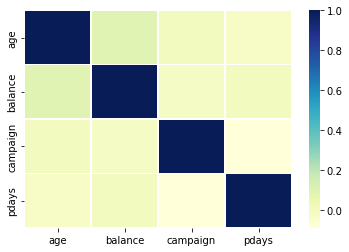

In [11]:
corr = df.corr()
sns.heatmap(corr,cmap="YlGnBu", linewidths=.5)

In [12]:
exp_name = setup(data = df,  target = 'y',session_id = 123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(45211, 12)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8932,0.7641,0.1826,0.6690,0.2863,0.2485,0.3112,0.4030
lightgbm,Light Gradient Boosting Machine,0.8926,0.7584,0.1923,0.6483,0.2961,0.2561,0.3127,0.1500
lr,Logistic Regression,0.8925,0.7465,0.1679,0.6774,0.2685,0.2326,0.3004,0.5910
ridge,Ridge Classifier,0.8925,0.0000,0.1872,0.6540,0.2903,0.2511,0.3100,0.0220
lda,Linear Discriminant Analysis,0.8925,0.7408,0.1878,0.6521,0.2908,0.2514,0.3098,0.0470
ada,Ada Boost Classifier,0.8924,0.7612,0.1757,0.6619,0.2768,0.2394,0.3025,0.1300
catboost,CatBoost Classifier,0.8911,0.7582,0.1904,0.6222,0.2912,0.2498,0.3023,1.7120
xgboost,Extreme Gradient Boosting,0.8901,0.7472,0.1848,0.6094,0.2832,0.2418,0.2933,0.4580
rf,Random Forest Classifier,0.8830,0.7195,0.2055,0.5076,0.2924,0.2409,0.2705,0.3290
knn,K Neighbors Classifier,0.8758,0.6093,0.1222,0.4067,0.1877,0.1411,0.1716,0.3660


In [14]:
exp_name = setup(data = df,  target = 'y',session_id = 123, normalize=True)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(45211, 12)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8932,0.7641,0.1826,0.6690,0.2863,0.2485,0.3112,0.4020
lr,Logistic Regression,0.8925,0.7469,0.1703,0.6757,0.2713,0.2350,0.3019,0.0820
ridge,Ridge Classifier,0.8925,0.0000,0.1872,0.6540,0.2903,0.2511,0.3100,0.0430
lda,Linear Discriminant Analysis,0.8925,0.7408,0.1878,0.6521,0.2908,0.2514,0.3098,0.0490
svm,SVM - Linear Kernel,0.8924,0.0000,0.1875,0.6519,0.2904,0.2510,0.3095,0.0390
ada,Ada Boost Classifier,0.8924,0.7612,0.1757,0.6619,0.2768,0.2394,0.3025,0.1490
lightgbm,Light Gradient Boosting Machine,0.8923,0.7581,0.1902,0.6435,0.2931,0.2531,0.3094,0.1260
catboost,CatBoost Classifier,0.8911,0.7582,0.1904,0.6222,0.2912,0.2498,0.3023,1.8940
xgboost,Extreme Gradient Boosting,0.8901,0.7472,0.1848,0.6094,0.2832,0.2418,0.2933,0.5080
rf,Random Forest Classifier,0.8840,0.7224,0.2071,0.5183,0.2957,0.2450,0.2760,0.3460


In [16]:
gbc=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8904,0.7554,0.1613,0.6316,0.2570,0.2196,0.2808
1,0.8929,0.7893,0.2043,0.6387,0.3096,0.2679,0.3198
2,0.8885,0.7501,0.1371,0.6145,0.2242,0.1894,0.2532
3,0.8954,0.7757,0.2043,0.6847,0.3147,0.2756,0.3357
4,0.8970,0.7664,0.1957,0.7374,0.3093,0.2734,0.3453
5,0.8954,0.7673,0.1903,0.7100,0.3002,0.2635,0.3317
6,0.8910,0.7565,0.1930,0.6207,0.2945,0.2527,0.3042
7,0.8951,0.7559,0.1909,0.6961,0.2996,0.2622,0.3278
8,0.8925,0.7716,0.1909,0.6455,0.2946,0.2546,0.3110
9,0.8935,0.7529,0.1586,0.7108,0.2593,0.2261,0.3023


In [17]:
#tune model for each fold
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8907,0.7520,0.1613,0.6383,0.2575,0.2206,0.2829
1,0.8923,0.7900,0.1989,0.6325,0.3027,0.2611,0.3133
2,0.8897,0.7567,0.1290,0.6575,0.2157,0.1843,0.2576
3,0.8938,0.7749,0.1935,0.6667,0.3000,0.2609,0.3205
4,0.8973,0.7706,0.1957,0.7449,0.3100,0.2744,0.3476
5,0.8954,0.7649,0.1957,0.7019,0.3061,0.2685,0.3339
6,0.8894,0.7555,0.1903,0.5966,0.2886,0.2456,0.2935
7,0.8963,0.7545,0.1882,0.7292,0.2991,0.2636,0.3359
8,0.8906,0.7703,0.1828,0.6182,0.2822,0.2415,0.2950
9,0.8922,0.7571,0.1478,0.6962,0.2439,0.2114,0.2875


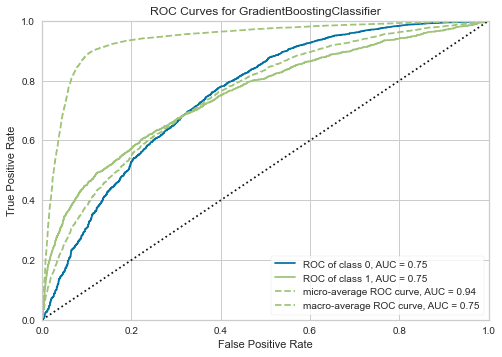

In [18]:
plot_model(tuned_gbc)

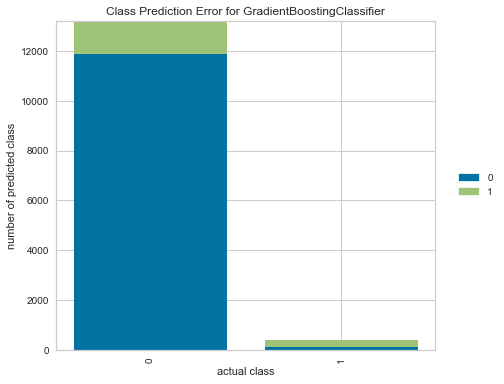

In [19]:
plot_model(tuned_gbc, plot = 'error')

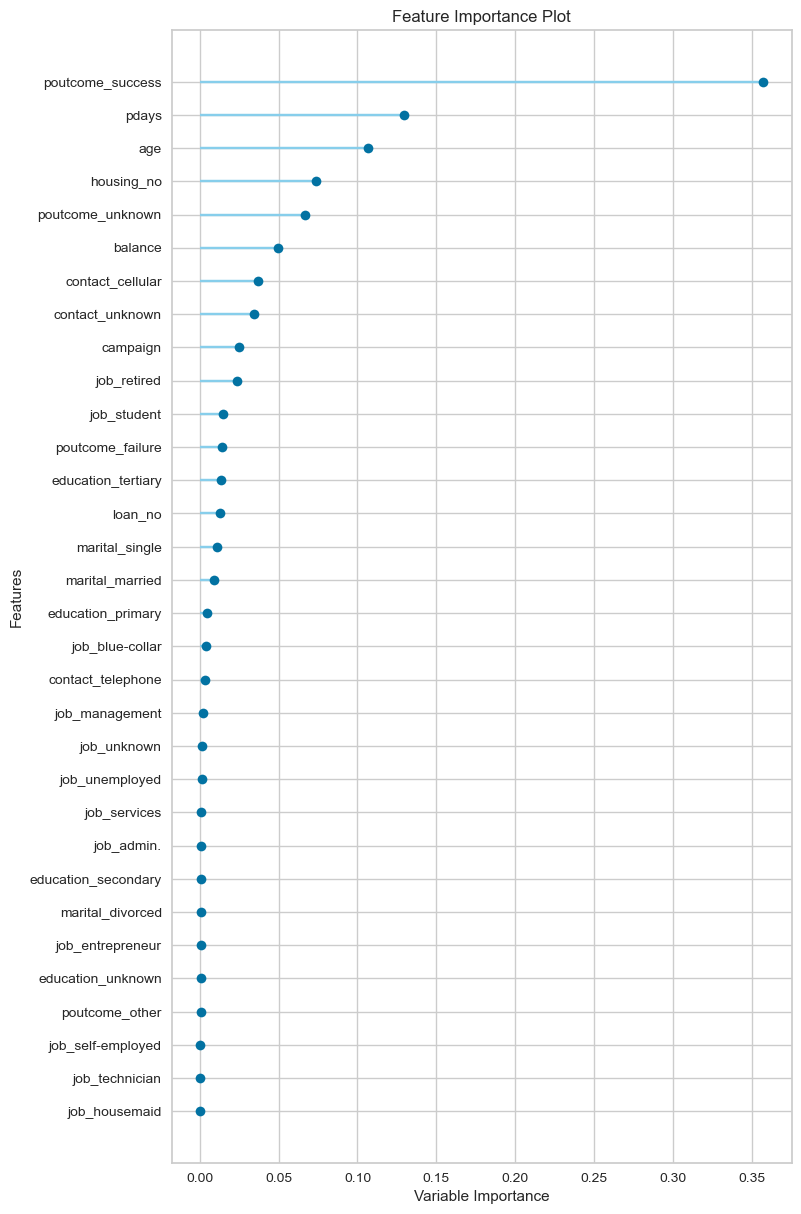

In [20]:
plot_model(tuned_gbc, plot='feature_all')

In [21]:
final_gbc = finalize_model(tuned_gbc)

In [23]:
#These process could be done sklearn easly in case you want these are parameter for hypermeter tuning so we could apply this manually
print(final_gbc.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.163, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.5, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 220, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 123, 'subsample': 0.95, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
#MODEL DEPLOYMENT after this step
# sets appropriate credentials for the platform as environment variables
import os
os.environ["AWS_ACCESS_KEY_ID"] = str("foo")
os.environ["AWS_SECRET_ACCESS_KEY"] = str("bar")
deploy_model(model = lr, model_name = 'lr-for-deployment', platform = 'aws', authentication = {'bucket' : 'S3-bucket-name'})